Team No More Mosquitoes
Sudhana Lai, Pratit Vithalani, Nathan Phan

Read from the mortality excel sheet and create a table with only the latitude, longitude, mortality rate, and country

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
file_name = 'journal.pntd.0005625.s002.xlsx'
sheet='field samples'
df = pd.read_excel(io=file_name,sheet_name=sheet)
df=df.loc[(df['Insecticide class']=='pyrethroid') & (df['Test value type']=='mortality')]
lat = df['Latitude'].values.tolist()
long = df['Longitude'].values.tolist()
value = df['Test value'].values.tolist()
country = df['Country'].values.tolist()
table = [long,lat,value,country]

Plot the resistances onto a map

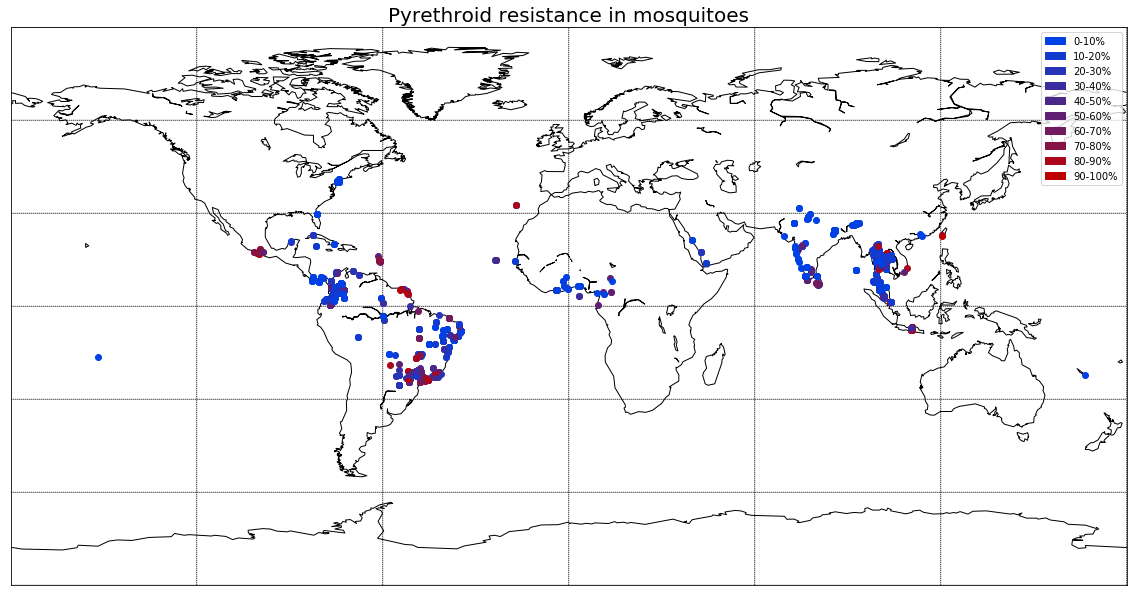

In [15]:
fig = plt.figure(figsize=(20,80))
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawcoastlines()
map.drawparallels(np.arange(-90.,91.,30.))
map.drawmeridians(np.arange(-180.,181.,60.))
tenPercent = mpatches.Patch(color='#0041E5',label = '0-10%')
twentyP = mpatches.Patch(color='#133ACE',label = '10-20%')
thirtyP = mpatches.Patch(color='#2634B7',label = '20-30%')
fourtyP = mpatches.Patch(color='#392DA1',label='30-40%')
fiftyP = mpatches.Patch(color='#4C278A',label = '40-50%')
sixtyP = mpatches.Patch(color='#5F2074',label='50-60%')
seventyP = mpatches.Patch(color='#721A5D',label='60-70%')
eightyP = mpatches.Patch(color='#851346',label='70-80%')
ninetyP = mpatches.Patch(color='#AB0619',label = '80-90%')
hundredP = mpatches.Patch(color='#BF0003',label = '90-100%')
plt.legend(handles=[tenPercent,twentyP,thirtyP,fourtyP,fiftyP,sixtyP,seventyP
                   ,eightyP,ninetyP,hundredP])
plt.title('Pyrethroid resistance in mosquitoes',fontsize=20)
for i in range(len(table[0])):
    x,y = map(table[0][i],table[1][i])
    if((table[2][i]>0)&(table[2][i]<10)):
        col = '#BF0003'        
    if((table[2][i]>=10)&(table[2][i]<20)):
        col = '#AB0619'
    if((table[2][i]>=20)&(table[2][i]<30)):
        col = '#851346'
    if((table[2][i]>=30)&(table[2][i]<40)):
        col = '#721A5D'
    if((table[2][i]>=40)&(table[2][i]<50)):
        col = '#5F2074'
    if((table[2][i]>=50)&(table[2][i]<60)):
        col = '#4C278A'
    if((table[2][i]>=60)&(table[2][i]<70)):
        col = '#392DA1'
    if((table[2][i]>=70)&(table[2][i]<80)):
        col = '#2634B7'
    if((table[2][i]>=80)&(table[2][i]<90)):
        col = '#133ACE'
    if((table[2][i]>=90)&(table[2][i]<100)):
        col = '#0041E5'
    map.plot(x,y,marker='o',color=col)
plt.savefig('resistance.png')
plt.show()

Read from the pyrethroid usage file

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
file_name2 = 'FAOSTAT_data_4-28-2019.xls'
sheet2 = 'Sheet1'
df2 = pd.read_excel(io=file_name2,sheet_name=sheet2)
area =  df2['Area'].values.tolist()
year = df2['Year'].values.tolist()
amt = df2['Value'].values.tolist()
table2 = [area,year,amt]
latest_value=[[],[],[]]
Curr_Country = table2[0][0]
for i in range(len(table2[0])):
    if(Curr_Country!=table2[0][i]):
        latest_value[0].append(table2[0][i-1])
        latest_value[1].append(table2[1][i-1])
        latest_value[2].append(table2[2][i-1])
        Curr_Country = table2[0][i]
        
countries_dict = {}
for i in range(len(latest_value[0])):
    countries_dict[latest_value[0][i]]=latest_value[2][i]

Combine resistances and usages into a single list

In [17]:
processed_resistance = [[],[]] #Only worried about resistances and usage
#[usage][resistance] usage wil be x values, resistance y values
for i in range(len(table[2])):
    processed_resistance[1].append(int(100-table[2][i]))
    if(table[3][i] in table2[0]):
        processed_resistance[0].append(countries_dict[table[3][i]])
    else:
        processed_resistance[0].append(0)


Create a scatter plot

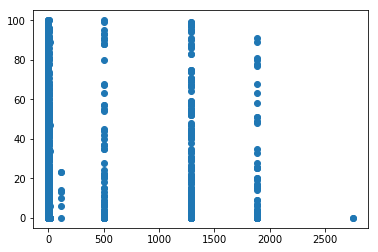

In [18]:
plt.scatter(processed_resistance[0],processed_resistance[1])
plt.show()

Repeat the reading and plotting for the organophosphates

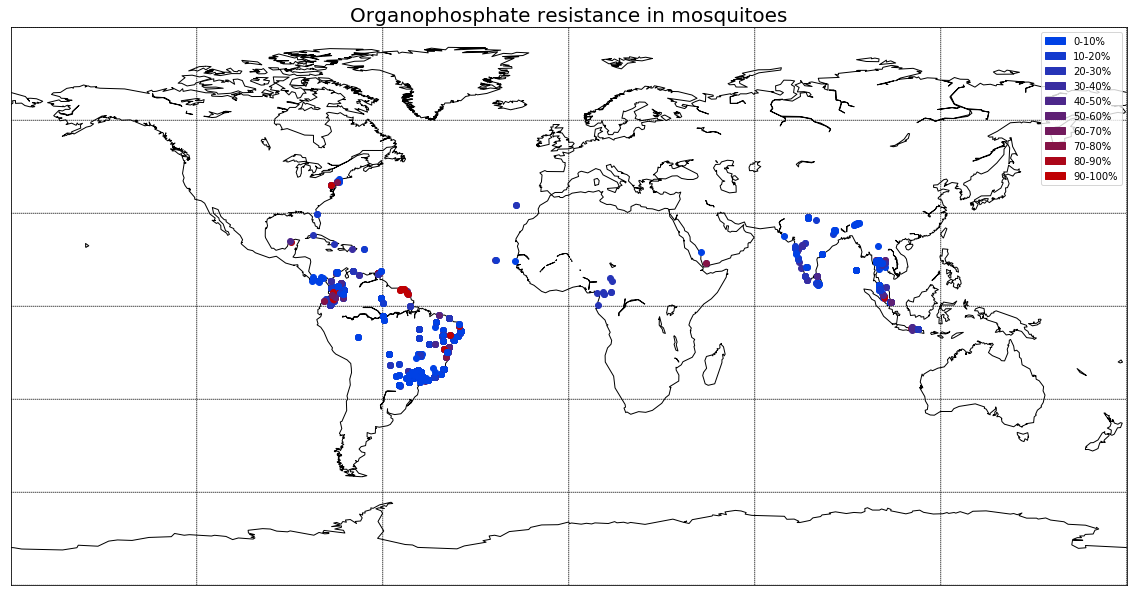

In [19]:
fig = plt.figure(figsize=(20,80))
file_name = 'journal.pntd.0005625.s002.xlsx'
sheet='field samples'
df3 = pd.read_excel(io=file_name,sheet_name=sheet)
df3 = df3.loc[(df3['Insecticide class']=='organophosphate') & (df3['Test value type']=='mortality')]
lat2 = df3['Latitude'].values.tolist()
long2 = df3['Longitude'].values.tolist()
value2 = df3['Test value'].values.tolist()
country2 = df3['Country'].values.tolist()
orgtable = [long2,lat2,value2,country2]
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map.drawcoastlines()
map.drawparallels(np.arange(-90.,91.,30.))
map.drawmeridians(np.arange(-180.,181.,60.))
tenPercent = mpatches.Patch(color='#0041E5',label = '0-10%')
twentyP = mpatches.Patch(color='#133ACE',label = '10-20%')
thirtyP = mpatches.Patch(color='#2634B7',label = '20-30%')
fourtyP = mpatches.Patch(color='#392DA1',label='30-40%')
fiftyP = mpatches.Patch(color='#4C278A',label = '40-50%')
sixtyP = mpatches.Patch(color='#5F2074',label='50-60%')
seventyP = mpatches.Patch(color='#721A5D',label='60-70%')
eightyP = mpatches.Patch(color='#851346',label='70-80%')
ninetyP = mpatches.Patch(color='#AB0619',label = '80-90%')
hundredP = mpatches.Patch(color='#BF0003',label = '90-100%')
plt.legend(handles=[tenPercent,twentyP,thirtyP,fourtyP,fiftyP,sixtyP,seventyP
                   ,eightyP,ninetyP,hundredP])
plt.title('Organophosphate resistance in mosquitoes',fontsize=20)
for i in range(len(orgtable[0])):
    x,y = map(orgtable[0][i],orgtable[1][i])
    if((orgtable[2][i]>0)&(orgtable[2][i]<10)):
        col = '#BF0003'        
    if((orgtable[2][i]>=10)&(orgtable[2][i]<20)):
        col = '#AB0619'
    if((orgtable[2][i]>=20)&(orgtable[2][i]<30)):
        col = '#851346'
    if((orgtable[2][i]>=30)&(orgtable[2][i]<40)):
        col = '#721A5D'
    if((orgtable[2][i]>=40)&(orgtable[2][i]<50)):
        col = '#5F2074'
    if((orgtable[2][i]>=50)&(orgtable[2][i]<60)):
        col = '#4C278A'
    if((orgtable[2][i]>=60)&(orgtable[2][i]<70)):
        col = '#392DA1'
    if((orgtable[2][i]>=70)&(orgtable[2][i]<80)):
        col = '#2634B7'
    if((orgtable[2][i]>=80)&(orgtable[2][i]<90)):
        col = '#133ACE'
    if((orgtable[2][i]>=90)&(orgtable[2][i]<100)):
        col = '#0041E5'
    map.plot(x,y,marker='o',color=col)
plt.savefig('orgresistance.png')
plt.show()

Read from the organophosphate usage file

In [20]:
file_name2 = 'FAOSTAT_data Organo-Phosphates.xlsx'
sheet2 = 'FAOSTAT_data Organo-Phosphates'
df4 = pd.read_excel(io=file_name2,sheet_name=sheet2)
area =  df4['Area'].values.tolist()
year = df4['Year'].values.tolist()
amt = df4['Value'].values.tolist()
table4 = [area,year,amt]
latest_value2=[[],[],[]]
Curr_Country = table4[0][0]
for i in range(len(table4[0])):
    if(Curr_Country!=table4[0][i]):
        latest_value2[0].append(table4[0][i-1])
        latest_value2[1].append(table4[1][i-1])
        latest_value2[2].append(table4[2][i-1])
        Curr_Country = table4[0][i]
        
countries_dict = {}
for i in range(len(latest_value2[0])):
    countries_dict[latest_value2[0][i]]=latest_value2[2][i]

Put the organophosphate resistances and usages into a table

In [21]:
processed_resistance2 = [[],[]] #Only worried about resistances and usage
#[usage][resistance] usage wil be x values, resistance y values
for i in range(len(orgtable[2])):
    processed_resistance2[1].append(int(100-orgtable[2][i]))
    if(orgtable[3][i] in table4[0]):
        processed_resistance2[0].append(countries_dict[orgtable[3][i]])
    else:
        processed_resistance2[0].append(0)

Create a scatter plot of the organophosphate usages

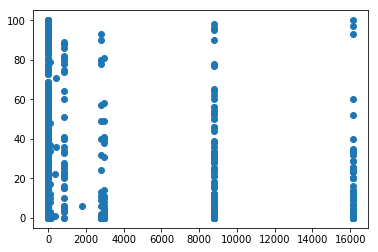

In [22]:
plt.scatter(processed_resistance2[0],processed_resistance2[1])
plt.show()

Plot the linear regression. Also calculate the spearman coefficient and p-value

-0.01029557280066225
32.47234775592382


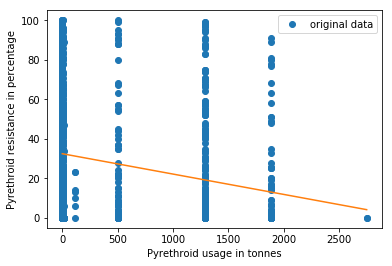

-0.0002790569199935854
12.879573791392295


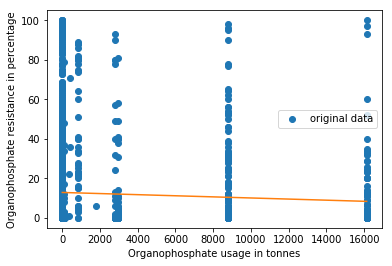

rho for pyrethroids:  -0.41313132600136504
pval for pyrethroids:  9.450157279151278e-74
rho for organophosphates:  -0.15467570740131292
pval for organophosphates:  2.4866863414158546e-11


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as s

def calc_and_graph_linregress(arr1, arr2, insecticide):
    if(len(arr1) == len(arr2)):
        slope, intercept, r_value, p_value, std_err = s.linregress(arr1, arr2)
        print(slope)
        print(intercept)

        plt.plot(arr1, arr2, 'o', label='original data')
        plt.ylabel(insecticide + ' resistance in percentage')
        plt.xlabel(insecticide + ' usage in tonnes')
        
        x = np.linspace(0,max(arr1))
        ys = []
        for i in range(len(x)):
            curr_y = (slope*x[i])+intercept
            ys.append(curr_y)
        plt.plot(x,ys)
        
        plt.legend()
        plt.show()
    else:
        return false

calc_and_graph_linregress(processed_resistance[0],processed_resistance[1], 'Pyrethroid')
calc_and_graph_linregress(processed_resistance2[0], processed_resistance2[1], 'Organophosphate')

rho, pval = s.spearmanr(processed_resistance[0], processed_resistance[1])
print('rho for pyrethroids: ',rho)
print('pval for pyrethroids: ', pval)
rho2, pval2 = s.spearmanr(processed_resistance2[0], processed_resistance2[1])
print('rho for organophosphates: ',rho2)
print('pval for organophosphates: ', pval2)